In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [89]:
df = pd.read_csv('/Users/mac/Desktop/-Health-Sales-Data-/PBJ_Daily_Nurse_Staffing_Q1_2024.csv',encoding='iso-8859-1',low_memory=False)

In [3]:
df.head()

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
0,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240101,50,8.0,...,0.0,156.34,156.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240102,49,8.0,...,0.0,149.40,149.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240103,49,8.0,...,0.0,147.15,147.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240104,50,8.0,...,0.0,142.21,142.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240105,51,8.0,...,0.0,149.40,149.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Convert 'WorkDate' column to datetime
df['WorkDate'] = pd.to_datetime(df['WorkDate'], format='%Y%m%d', errors='coerce')

In [5]:
#lets make sure the year Qtr are only for Q1
df['CY_Qtr'].value_counts()

CY_Qtr
2024Q1    1048575
Name: count, dtype: int64

In [9]:
#check data null values has 0 missing values 
df.isnull().sum()

PROVNUM             0
PROVNAME            0
CITY                0
STATE               0
COUNTY_NAME         0
COUNTY_FIPS         0
CY_Qtr              0
WorkDate            0
MDScensus           0
Hrs_RNDON           0
Hrs_RNDON_emp       0
Hrs_RNDON_ctr       0
Hrs_RNadmin         0
Hrs_RNadmin_emp     0
Hrs_RNadmin_ctr     0
Hrs_RN              0
Hrs_RN_emp          0
Hrs_RN_ctr          0
Hrs_LPNadmin        0
Hrs_LPNadmin_emp    0
Hrs_LPNadmin_ctr    0
Hrs_LPN             0
Hrs_LPN_emp         0
Hrs_LPN_ctr         0
Hrs_CNA             0
Hrs_CNA_emp         0
Hrs_CNA_ctr         0
Hrs_NAtrn           0
Hrs_NAtrn_emp       0
Hrs_NAtrn_ctr       0
Hrs_MedAide         0
Hrs_MedAide_emp     0
Hrs_MedAide_ctr     0
dtype: int64

In [6]:
# load data set downloaded from website provided ('NH_provider_info') into dataframe for further analysis
df_provider=pd.read_csv('/Users/mac/Desktop/Health-Sales-Data-/NH_ProviderInfo_Sep2024.csv')

In [8]:
df_provider.head()

,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,ZIP Code,Telephone Number,Provider SSA County Code,County/Parish,Ownership Type,...,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Latitude,Longitude,Geocoding Footnote,Processing Date
0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,290,Franklin,For profit - Corporation,...,NaN,1,23989.0,0,1,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",34.5149,-87.736,NaN,2024-09-01
1,015010,COOSA VALLEY HEALTHCARE CENTER,260 WEST WALNUT STREET,SYLACAUGA,AL,35150,2562495604,600,Talladega,For profit - Corporation,...,0.0,0,0.0,0,0,"260 WEST WALNUT STREET,SYLACAUGA,AL,35150",33.1637,-86.254,NaN,2024-09-01
2,015012,HIGHLANDS HEALTH AND REHAB,380 WOODS COVE ROAD,SCOTTSBORO,AL,35768,2562183708,350,Jackson,Government - County,...,NaN,0,0.0,0,0,"380 WOODS COVE ROAD,SCOTTSBORO,AL,35768",34.6611,-86.047,NaN,2024-09-01
3,015014,EASTVIEW REHABILITATION & HEALTHCARE CENTER,7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206,2058330146,360,Jefferson,For profit - Individual,...,0.0,0,0.0,0,0,"7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206",33.5595,-86.722,NaN,2024-09-01
4,015015,PLANTATION MANOR NURSING HOME,6450 OLD TUSCALOOSA HIGHWAY,MC CALLA,AL,35111,2054776161,360,Jefferson,For profit - Individual,...,NaN,0,0.0,0,0,"6450 OLD TUSCALOOSA HIGHWAY,MC CALLA,AL,35111",33.3221,-87.034,NaN,2024-09-01


In [9]:
#Check Missing value and 
df_provider.isnull().sum()

CMS Certification Number (CCN)        0
Provider Name                         0
Provider Address                      0
City/Town                             0
State                                 0
                                  ...  
Location                              0
Latitude                              0
Longitude                             0
Geocoding Footnote                14020
Processing Date                       0
Length: 103, dtype: int64

In [10]:
#drop note-geolocation null all missing values removed 
df_provider=df_provider.dropna()

In [11]:
# Melt the DataFrame to long format for easy exploring 
hour_columns = [
    'Hrs_RNDON', 'Hrs_RNDON_emp', 'Hrs_RNDON_ctr',
    'Hrs_RNadmin', 'Hrs_RNadmin_emp', 'Hrs_RNadmin_ctr',
    'Hrs_RN', 'Hrs_RN_emp', 'Hrs_RN_ctr',
    'Hrs_LPNadmin', 'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr',
    'Hrs_LPN', 'Hrs_LPN_emp', 'Hrs_LPN_ctr',
    'Hrs_CNA', 'Hrs_CNA_emp', 'Hrs_CNA_ctr',
    'Hrs_NAtrn', 'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr',
    'Hrs_MedAide', 'Hrs_MedAide_emp', 'Hrs_MedAide_ctr'
]

df_melted = df.melt(id_vars=['PROVNUM', 'PROVNAME', 'CITY', 'STATE', 'COUNTY_NAME', 'COUNTY_FIPS', 'CY_Qtr', 'WorkDate', 'MDScensus'],
                    value_vars=hour_columns,
                    var_name='Hour_Type',
                    value_name='Hours')


In [117]:
df.head(1)

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
0,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240101,50,8.0,...,0.0,156.34,156.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
df_melted.head(1)

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hour_Type,Hours,DayOfWeek,Employee_Hours
0,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,2024-01-01,50,Hrs_RNDON,8.0,Monday,0.0


/var/folders/gk/537qy50d4ls5vppc09_8xb0r0000gn/T/ipykernel_818/2052363222.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=providers_count_by_state, x='STATE', y='Provider_Count', palette='coolwarm')


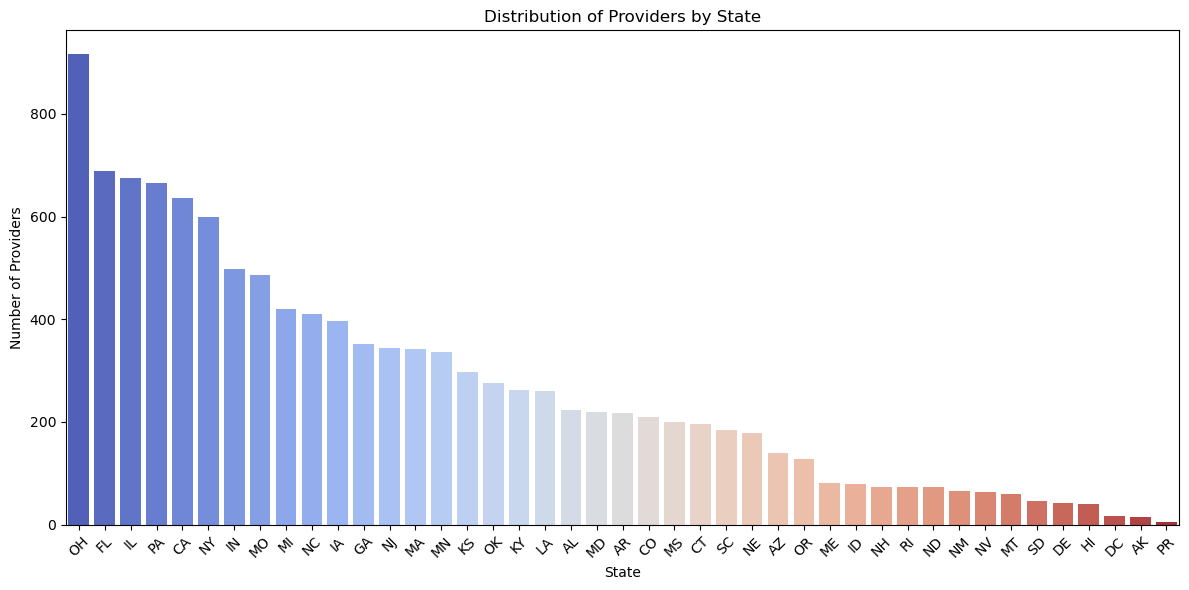

In [12]:
#lets check how the facilities are distributited in the STATES
# Counting the number of unique providers by state
providers_count_by_state = df_melted.groupby('STATE')['PROVNAME'].nunique().reset_index()

# Renaming the columns for clarity
providers_count_by_state.columns = ['STATE', 'Provider_Count']

# sorting the results
providers_count_by_state = providers_count_by_state.sort_values(by='Provider_Count', ascending=False)

# Visualizing the distribution
plt.figure(figsize=(12, 6))
sns.barplot(data=providers_count_by_state, x='STATE', y='Provider_Count', palette='coolwarm')

plt.title('Distribution of Providers by State')
plt.xlabel('State')
plt.ylabel('Number of Providers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("chart1.1.png")
plt.show()


In [13]:
#lets find out how many provider we have in the dataset and most of these fciltiles are in OH 
unique_providers_count = df_melted['PROVNAME'].nunique()
print("Unique Providers Count:", unique_providers_count)


Unique Providers Count: 11405


In [14]:
#check total hours by each provider to checkout where are the most hours espending and by which provider ?
#lets find out how many provider we have in the dataset and most of these fciltiles are in OH 
total_hours_by_provider = df_melted.groupby(['PROVNAME','CITY'])['Hours'].sum().reset_index()
print(total_hours_by_provider)


                                       PROVNAME        CITY      Hours
0                                  15 CRAIGSIDE    HONOLULU   39242.30
1                                    24TH PLACE      NORMAN   33903.84
2                                       60 WEST  ROCKY HILL   71594.88
3              A GRACE SUB ACUTE & SKILLED CARE    SAN JOSE   63282.50
4      A HOLLY PATTERSON EXTENDED CARE FACILITY   UNIONDALE  275118.90
...                                         ...         ...        ...
11513    ZEBULON PARK HEALTH AND REHABILITATION       MACON   38963.98
11514             ZEBULON REHABILITATION CENTER     ZEBULON   34571.50
11515             ZERBE SISTERS NURSING CENTER,      NARVON   58651.56
11516                        ZIONSVILLE MEADOWS  ZIONSVILLE   42663.34
11517                      ZUMBROTA CARE CENTER    ZUMBROTA   23962.82

[11518 rows x 3 columns]


In [136]:
sorted_total_hours_by_provider = total_hours_by_provider.sort_values(by='Hours', ascending=False)

In [134]:
sorted_total_hours_by_provider.head(10)

,PROVNAME,CITY,Hours
5060,ISABELLA GERIATRIC CENTER INC,NEW YORK,404400.24
2366,COLER REHABILITATION AND NURSING CARE CENTER,ROOSEVELT ISLAND,402659.82
5278,KINGS HARBOR MULTICARE CENTER,BRONX,389573.14
5938,LORETTO HEALTH AND REHABILITATION CENTER,SYRACUSE,378463.24
8750,"RUTLAND NURSING HOME, INC",BROOKLYN,369114.52
10203,THE PLAZA REHAB AND NURSING CENTER,BRONX,367224.00
2362,COLD SPRING HILLS CENTER FOR NURSING AND REHAB,WOODBURY,355681.78
2018,CEDARBROOK SENIOR CARE AND REHABILITATION,ALLENTOWN,355351.90
6589,"MIAMI JEWISH HEALTH SYSTEMS, INC",MIAMI,347356.58
1420,BORO PARK CENTER FOR REHABILITATION AND HEALTH...,BROOKLYN,339746.18


In [15]:
##check the total hours for top 10 facilities across states 
total_hours_per_state = df_melted.groupby(['PROVNAME','STATE'])['Hours'].sum().reset_index()
print(total_hours_per_state)

                                       PROVNAME STATE      Hours
0                                  15 CRAIGSIDE    HI   39242.30
1                                    24TH PLACE    OK   33903.84
2                                       60 WEST    CT   71594.88
3              A GRACE SUB ACUTE & SKILLED CARE    CA   63282.50
4      A HOLLY PATTERSON EXTENDED CARE FACILITY    NY  275118.90
...                                         ...   ...        ...
11494    ZEBULON PARK HEALTH AND REHABILITATION    GA   38963.98
11495             ZEBULON REHABILITATION CENTER    NC   34571.50
11496             ZERBE SISTERS NURSING CENTER,    PA   58651.56
11497                        ZIONSVILLE MEADOWS    IN   42663.34
11498                      ZUMBROTA CARE CENTER    MN   23962.82

[11499 rows x 3 columns]


In [16]:
##sorte the total hours for top 10 facilities across states
sorted_total_hours_per_state = total_hours_per_state.sort_values(by='Hours', ascending=False)

In [17]:
sorted_total_hours_per_state.head(10)

,PROVNAME,STATE,Hours
6630,MILLER'S MERRY MANOR,IN,483607.50
5053,ISABELLA GERIATRIC CENTER INC,NY,404400.24
2362,COLER REHABILITATION AND NURSING CARE CENTER,NY,402659.82
5272,KINGS HARBOR MULTICARE CENTER,NY,389573.14
5932,LORETTO HEALTH AND REHABILITATION CENTER,NY,378463.24
8731,"RUTLAND NURSING HOME, INC",NY,369114.52
9475,ST ANNS COMMUNITY,NY,368358.54
10185,THE PLAZA REHAB AND NURSING CENTER,NY,367224.00
2358,COLD SPRING HILLS CENTER FOR NURSING AND REHAB,NY,355681.78
2016,CEDARBROOK SENIOR CARE AND REHABILITATION,PA,355351.90


# Recommendation 1 Leverage High Staffing Demand in New York City
While most facilities are located in Ohio (OH), the city with the highest demand for staffing (total hours) is New York City (NYC), not Ohio. This suggests that although Ohio has more facilities, the individual facilities in NYC require more staffing hours on average.
The App is attractive solution for facilities facing staffing challenges, especially in densely populated areas.

/var/folders/gk/537qy50d4ls5vppc09_8xb0r0000gn/T/ipykernel_818/1185297253.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_facilities['ProviderWithState'] = top_10_facilities['PROVNAME'] + " (" + top_10_facilities['STATE'] + ")"


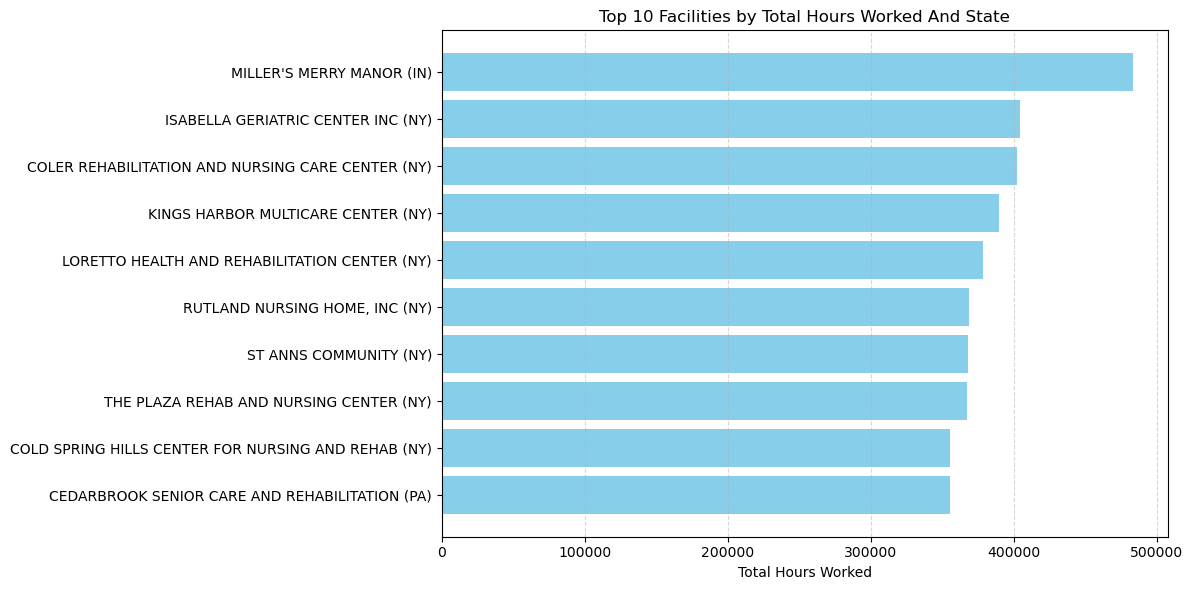

In [18]:
top_10_facilities = sorted_total_hours_per_state.head(10)

# Combine provider names with their state information
top_10_facilities['ProviderWithState'] = top_10_facilities['PROVNAME'] + " (" + top_10_facilities['STATE'] + ")"

# Extracting the names and hours for the top 10
facilities = top_10_facilities['ProviderWithState'].values
total_hours = top_10_facilities['Hours'].values

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.barh(facilities, total_hours, color='skyblue')
plt.title("Top 10 Facilities by Total Hours Worked And State")
plt.xlabel("Total Hours Worked")
plt.gca().invert_yaxis()  # To ensure the facility with the highest hours is at the top
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("Chart1.2.png")
plt.show()


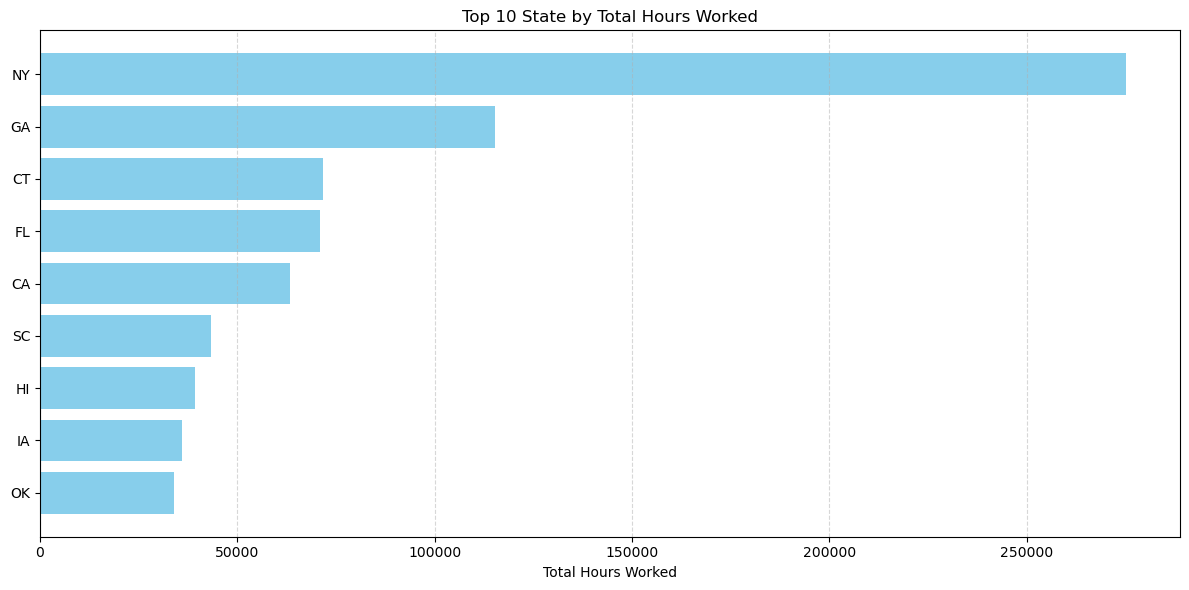

In [21]:
#visulaizing the top 1
top_10_provider_location = total_hours_per_state.head(15).sort_values(by='Hours', ascending=False)

# Extracting the names and hours for the top 10
facilities = top_10_provider_location['STATE'].values
total_hours = top_10_provider_location['Hours'].values

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.barh(facilities, total_hours, color='skyblue')
plt.title("Top 10 State by Total Hours Worked")
plt.xlabel("Total Hours Worked")
plt.gca().invert_yaxis()  # To ensure the facility with the highest hours is at the top
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("Chart1.3.png")
plt.show()


In [22]:
# Analyze the occupancy data ("MDScensus") to understand its distribution and trends over time

# Basic statistics for occupancy the working hours in each day
occupancy_stats = df_melted['MDScensus'].describe()

# Check the trend of occupancy over time (grouping by 'WorkDate')
occupancy_trend = df_melted.groupby('WorkDate')['MDScensus'].mean()

# Display the statistics and trend overview
occupancy_stats, occupancy_trend.head()


(count    2.516580e+07
 mean     8.578537e+01
 std      5.153744e+01
 min      0.000000e+00
 25%      5.200000e+01
 50%      7.800000e+01
 75%      1.070000e+02
 max      7.430000e+02
 Name: MDScensus, dtype: float64,
 WorkDate
 2024-01-01    83.927189
 2024-01-02    84.072377
 2024-01-03    84.356678
 2024-01-04    84.690272
 2024-01-05    84.896294
 Name: MDScensus, dtype: float64)

# findings 
Minimum: 0 residents — This indicates that there were times when facilities recorded no residents, possibly reflecting temporary closures or extreme low-occupancy days.
Maximum: 743 residents — The maximum number suggests some facilities have high capacities, which could be larger centers with higher demands.

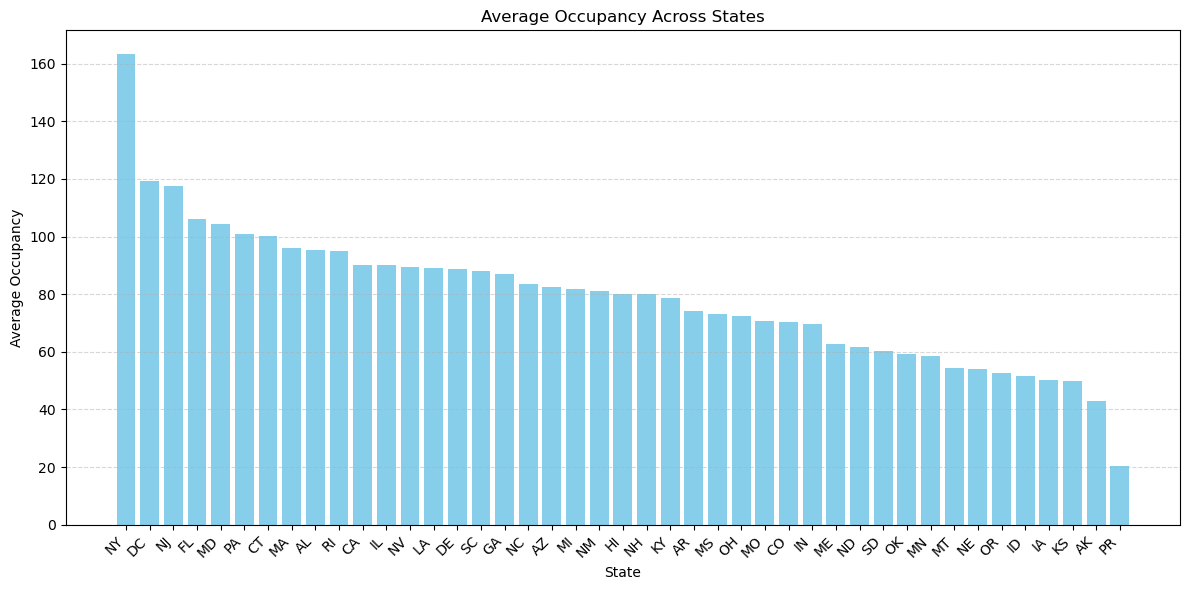

In [23]:

# Group the data by 'STATE' and calculate key statistics for occupancy across states
state_occupancy_stats = df.groupby('STATE')['MDScensus'].agg(['mean', 'std', 'min', 'max', 'count']).reset_index()

# Rename columns for clarity
state_occupancy_stats.columns = [
    'State', 'Average_Occupancy', 'Occupancy_Variability', 'Min_Occupancy', 'Max_Occupancy', 'Count'
]

# Sort by Average Occupancy before plotting
state_occupancy_stats_sorted = state_occupancy_stats.sort_values(by='Average_Occupancy', ascending=False)

# Create a bar chart with the sorted data
plt.figure(figsize=(12, 6))
plt.bar(state_occupancy_stats_sorted['State'], state_occupancy_stats_sorted['Average_Occupancy'], color='skyblue')
plt.title("Average Occupancy Across States")
plt.xlabel("State")
plt.ylabel("Average Occupancy")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("Chart1.4.png")

# Show the plot
plt.show()


# Recomendation 2: Promote the App during Peak Bed Utilization Periods
During the first two weeks of January, the data shows a steady increase in the number of active beds (MDScensus). To address this trend, the app should be promoted as a solution that guarantees high availability of staff, making it a reliable choice for facilities that need dependable support during busy periods."

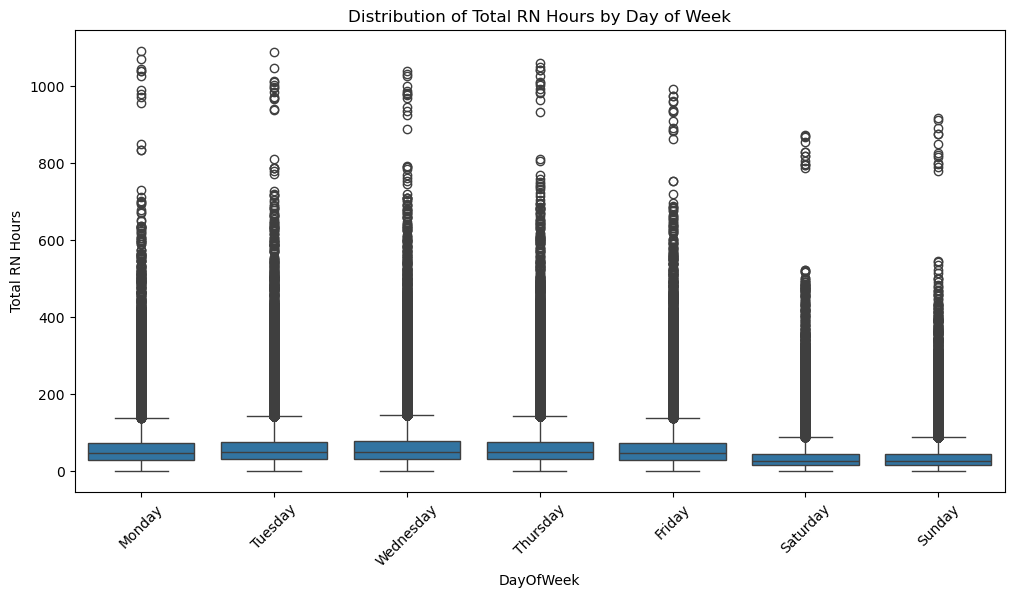

In [24]:
# Weekend Staffing Levels Analysis
# Calculate total RN hours
df['Total_RN_Hours'] = df['Hrs_RNDON'] + df['Hrs_RNadmin'] + df['Hrs_RN']

# Create a column for day of week
df['DayOfWeek'] = df['WorkDate'].dt.day_name()

# Plot RN hours by day of week
plt.figure(figsize=(12, 6))
sns.boxplot(x='DayOfWeek', y='Total_RN_Hours', data=df)
plt.title('Distribution of Total RN Hours by Day of Week')
plt.ylabel('Total RN Hours')
plt.xticks(rotation=45)
plt.savefig("Distribution of Total RN Hours by Day of Week.png")
plt.show()

In [118]:
#lets check which is the Most day that have the highest working hours 
avg_staffing_by_day = df_melted.groupby('DayOfWeek')['Hours'].mean().sort_values(ascending=False)

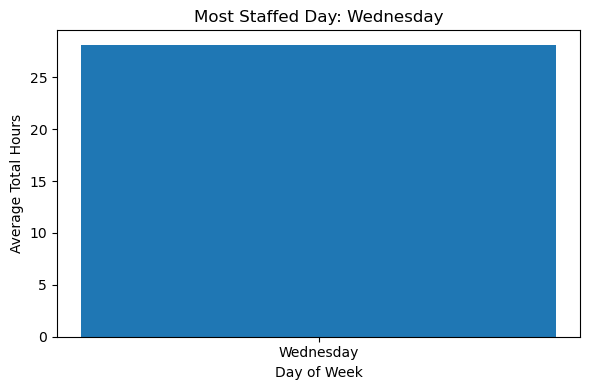

In [188]:
# Group by DayOfWeek and calculate the mean of Hours
avg_staffing_by_day = df_melted.groupby('DayOfWeek')['Hours'].mean()

# Find the day with the maximum average hours
max_day = avg_staffing_by_day.idxmax()
max_hours = avg_staffing_by_day.max()

# Filter to show only the day with the maximum hours
plt.figure(figsize=(6, 4))
plt.bar(max_day, max_hours)
plt.title(f'Most Staffed Day: {max_day}')
plt.xlabel('Day of Week')
plt.ylabel('Average Total Hours')
plt.tight_layout()
plt.show()


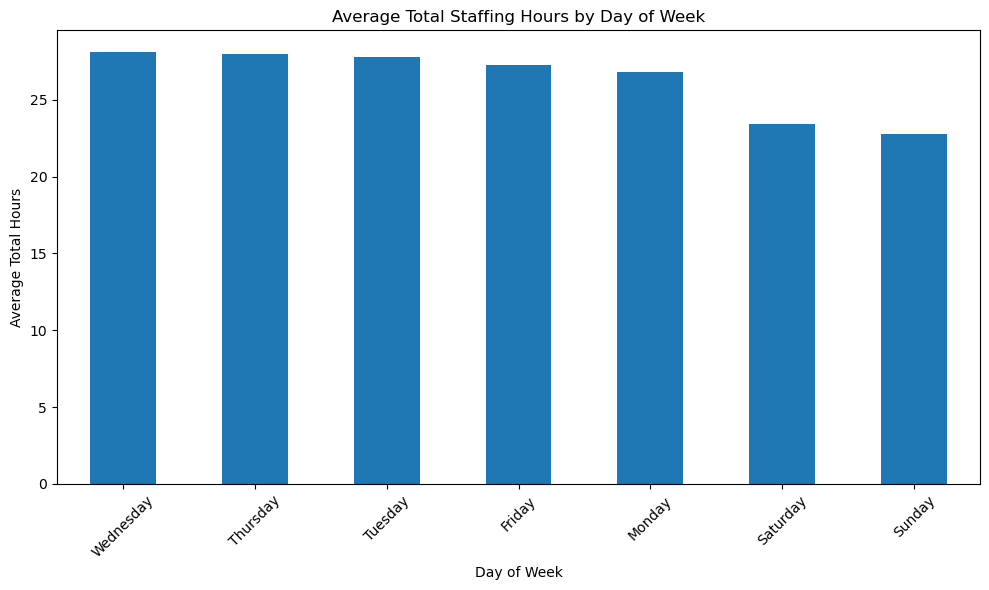

In [135]:
# Data-Driven Staffing Solutions
# Example: Predict staffing needs based on day of week
avg_staffing_by_day = df_melted.groupby('DayOfWeek')['Hours'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_staffing_by_day.plot(kind='bar')
plt.title('Average Total Staffing Hours by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Total Hours')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

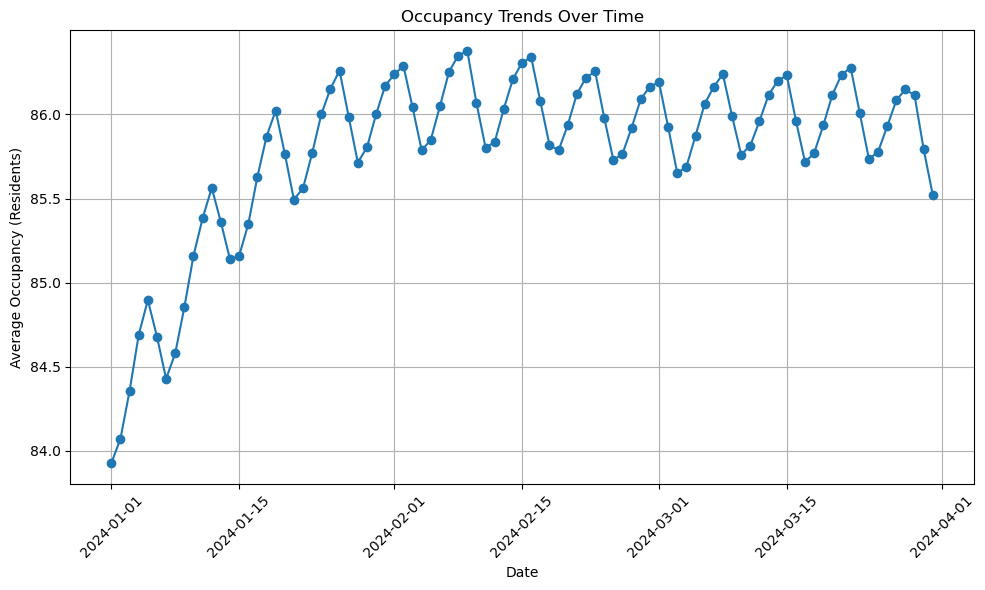

In [29]:

# Group the data by 'WorkDate' to calculate the mean occupancy per day
occupancy_trend = df_melted.groupby('WorkDate')['MDScensus'].mean()

# Plot the occupancy trend over time
plt.figure(figsize=(10, 6))
plt.plot(occupancy_trend.index, occupancy_trend.values, marker='o', linestyle='-')
plt.title("Occupancy Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Average Occupancy (Residents)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('Chart2.1.png')
plt.show()

In [ ]:
df_melted.head()

# Recommendation 3: Market the App as a Real-Time Staffing Optimization Tool
The app should be marketed as a solution that helps facilities fine-tune their staffing, ensuring that they have the right balance of CNAs, RNs, and LPNs at all times. Facilities can use the app to monitor demand in real-time and adjust staffing levels accordingly, thereby avoiding excess costs due to overstaffing or the risks associated with understaffing.

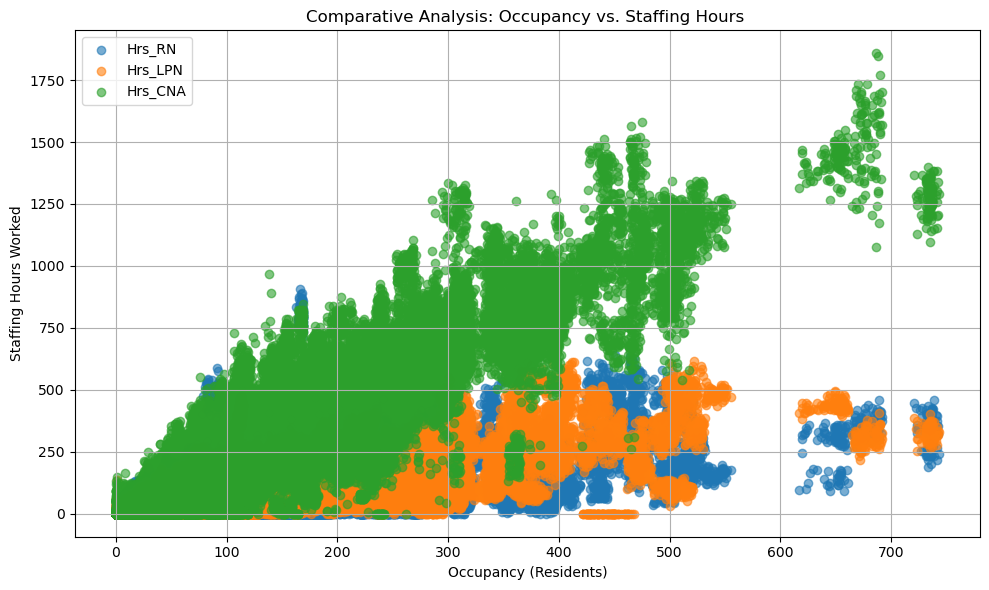

In [30]:
# Create a comparative analysis for different hour types (e.g., RN, LPN, CNA) versus occupancy
# Select a few key hour types from the dataset to compare (e.g., Hrs_RNDON, Hrs_LPN, Hrs_CNA)
hour_types = ['Hrs_RN', 'Hrs_LPN', 'Hrs_CNA']

# Plot each hour type against occupancy in a comparative scatter plot
plt.figure(figsize=(10, 6))
for hour_type in hour_types:
    plt.scatter(df['MDScensus'],df[hour_type], alpha=0.6, label=hour_type)
plt.title("Comparative Analysis: Occupancy vs. Staffing Hours ")
plt.xlabel("Occupancy (Residents)")
plt.ylabel("Staffing Hours Worked")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Chart3.png')
plt.show()


# Recommendation 4: Prioritize CNA and LPN Recruitment to Meet Demand Peak
Most significant Targets are CNA Certified Nurse Assisstant with over 54% according to the working hours among all.
suggeset the highest demand as the second target would be LPN licensce Practice Nurse.
Focus efforts on recruiting and onboarding more CNAs and LPN ensure steady supply specially during the peak


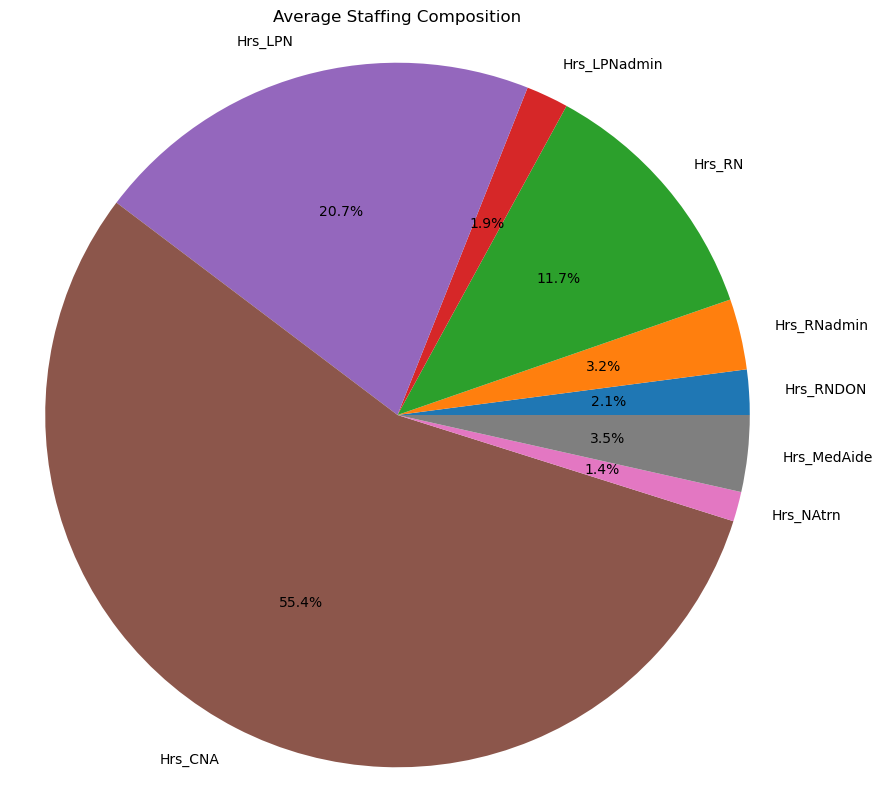

In [140]:
# Staffing Composition Analysis
staffing_categories = ['Hrs_RNDON', 'Hrs_RNadmin', 'Hrs_RN', 'Hrs_LPNadmin', 'Hrs_LPN', 'Hrs_CNA', 'Hrs_NAtrn', 'Hrs_MedAide']

df['Total_Hours'] = df[staffing_categories].sum(axis=1)

# Calculate percentage for each category
for category in staffing_categories:
    df[f'{category}_Percentage'] = df[category] / df['Total_Hours'] * 100

# Plot average staffing composition
avg_composition = df[[f'{category}_Percentage' for category in staffing_categories]].mean()

plt.figure(figsize=(10, 10))
plt.pie(avg_composition, labels=staffing_categories, autopct='%1.1f%%')
plt.title('Average Staffing Composition')
plt.axis('equal')
plt.savefig('Chart4.png')
plt.show()

In [124]:
# Load and prepare the ownership data
ownership_df = pd.read_csv('/Users/mac/Desktop/-Health-Sales-Data-/NH_Ownership_Sep2024.csv')

In [125]:
# Remove since from the date column
ownership_df['Association Date'] = ownership_df['Association Date'].str.replace('since ', '')

In [126]:
# Convert Association Date to datetime
ownership_df['Association Date'] = pd.to_datetime(ownership_df['Association Date'], format='%m/%d/%Y', errors='coerce')

In [142]:
# Merge two data sets PBJ_Daily_nursing_staff with Owenrship Data set to analyze if the managemnt type effect staffing 
merged_df = pd.merge(df, ownership_df, left_on='PROVNUM', right_on='CMS Certification Number (CCN)', how='inner')

print(f"Number of facilities after merge: {merged_df['PROVNUM'].nunique()}")

Number of facilities after merge: 9783


In [128]:
# Create fucntion to simplify Role played in facitlty by mapping role to Ownership , Managed , other
def simplify_role(role):
    if 'OWNERSHIP' in role:
        return 'Owner-Operated'
    elif 'OPERATIONAL/MANAGERIAL' in role:
        return 'Managed'
    else:
        return 'Other'


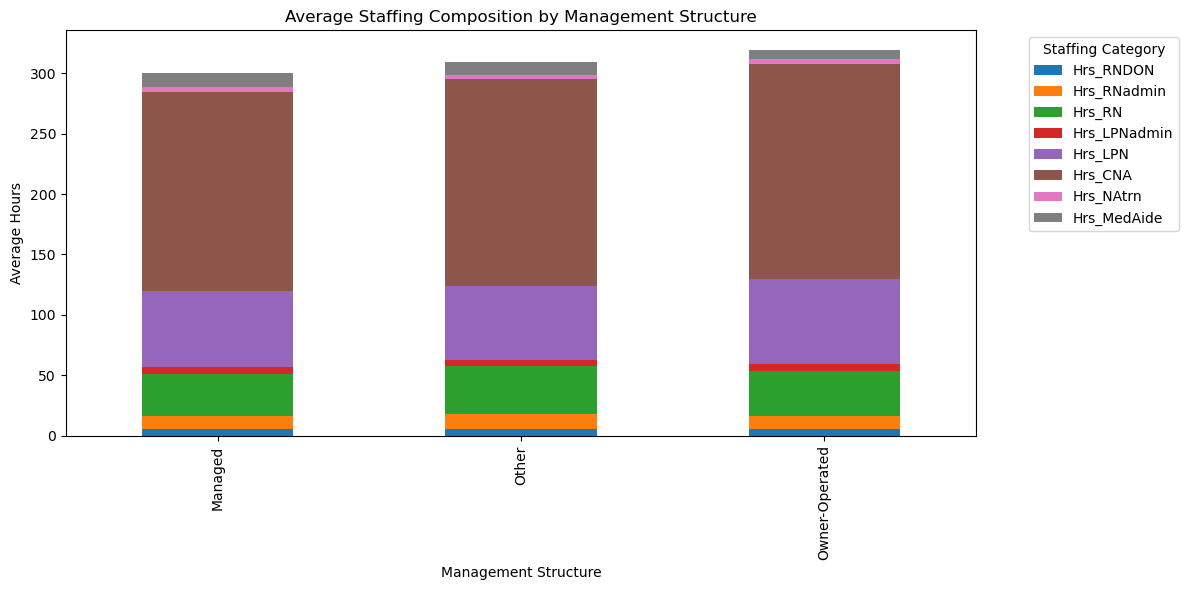

In [143]:

merged_df['Management_Structure'] = merged_df['Role played by Owner or Manager in Facility'].apply(simplify_role)

# Calculate average staffing composition for each management structure
staffing_composition = merged_df.groupby('Management_Structure')[staffing_categories].mean()

# Plot the staffing composition
staffing_composition.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Staffing Composition by Management Structure')
plt.xlabel('Management Structure')
plt.ylabel('Average Hours')
plt.legend(title='Staffing Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("Average Staffing Composition by Management Structure.png")
plt.show()

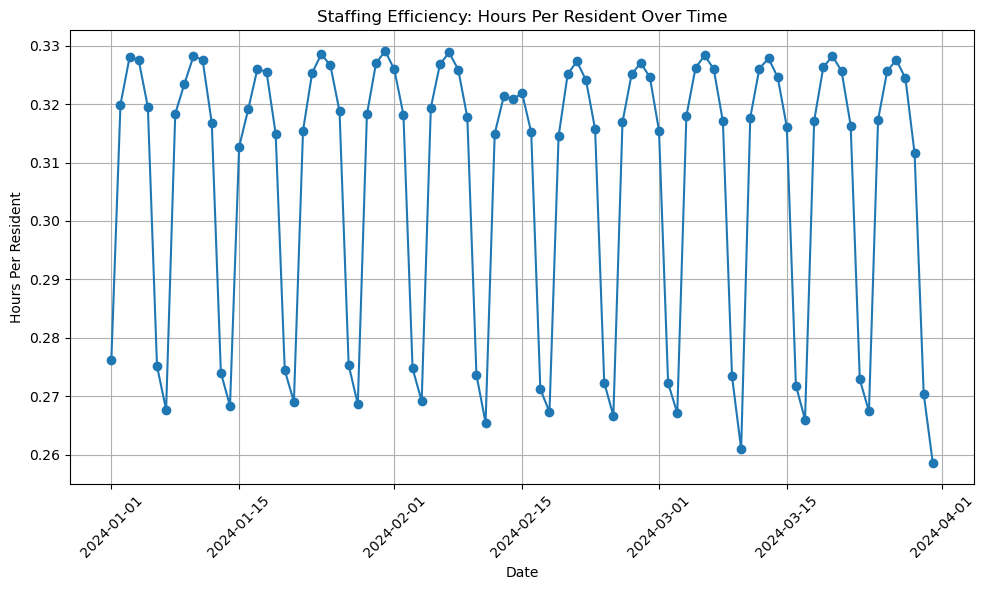

In [37]:
# Calculate the staffing efficiency: Hours per Resident (total hours worked / occupancy)
# We'll use columns for different types of staff hours and calculate the total staffing efficiency

# Ensure required columns are present in the dataset
required_columns = ['MDScensus', 'Hours', 'Hour_Type', 'WorkDate']
if all(col in df_melted.columns for col in required_columns):
    # Calculate total hours per day and divide by occupancy to get hours per resident
    daily_efficiency = df_melted.groupby(['WorkDate']).apply(
        lambda x: x['Hours'].sum() / x['MDScensus'].sum() if x['MDScensus'].sum() > 0 else 0
    ).reset_index(name='Hours_Per_Resident')

    # Plot the staffing efficiency trend over time
    plt.figure(figsize=(10, 6))
    plt.plot(daily_efficiency['WorkDate'], daily_efficiency['Hours_Per_Resident'], marker='o', linestyle='-')
    plt.title("Staffing Efficiency: Hours Per Resident Over Time")
    plt.xlabel("Date")
    plt.ylabel("Hours Per Resident")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('Chart5.2.png')
    plt.show()
 
else:
    print("The dataset does not contain the required columns for this analysis.")
    


# Recomendation 5 Target Facilities Needing Flexible and Consistent Staffing Solutions by checking the effect of employee to contractors in avarage of working hours  as long with management type if its After merage data set downloaded from the CMS webside "NH_Ownership_Sep2024" and NH_Ino_providers to analzying the managemnet effect on potinal matching 
Organization-owned and shorter ownership tenures facilities(less than 10 years) tend to have higher variability in staffing hours this may face unexpected peaks in staffing needs and require more adaptable, flexible staffing solutions to manage changes, fast sloution for additional staff matching during peaks moreover, longer tenure facilities are more stable but can still benefit from efficient management tools by trageting each group by spesicfic sloution 
At managment level to runs the facility, they always rely heavily on CNAs, with a balanced mix of LPNs and RNs regardless of it istructure 

In [172]:
df_extracted = pd.read_csv('extract.csv')

# Convert 'WorkDate' to datetime
df_extracted['WorkDate'] = pd.to_datetime(df_extracted['WorkDate'])

# Calculate correlation between Employee and Contractor hours
correlation = df_extracted['Total_Employee_Hours'].corr(df_extracted['Total_Contractor_Hours'])
print(f"Correlation between Employee Hours and Contractor Hours: {correlation}")

Correlation between Employee Hours and Contractor Hours: 0.15657296535559065


In [175]:

# Set WorkDate as the index
df_extracted.set_index('WorkDate', inplace=True)

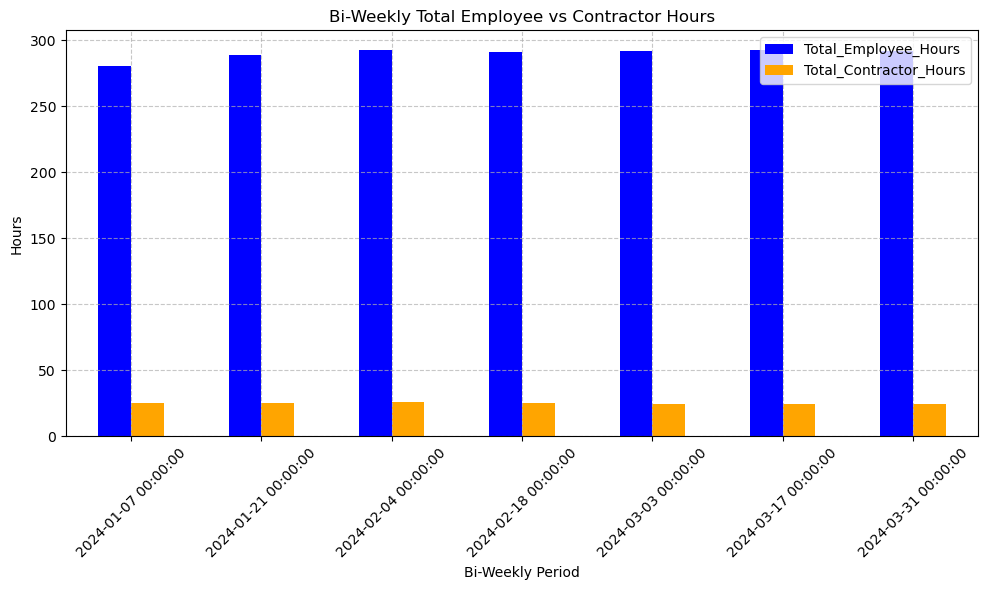

In [186]:

# Resample bi-weekly ('2W') and sum the employee and contractor hours
df_biweekly = df_extracted.resample('2W').mean()  # Resample every 2 weeks

# Plot the bi-weekly totals for Employee and Contractor Hours
df_biweekly[['Total_Employee_Hours', 'Total_Contractor_Hours']].plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])

# Add title and labels
plt.title('Bi-Weekly Total Employee vs Contractor Hours')
plt.ylabel('Hours')
plt.xlabel('Bi-Weekly Period')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('Chart5.1.png')
plt.show()


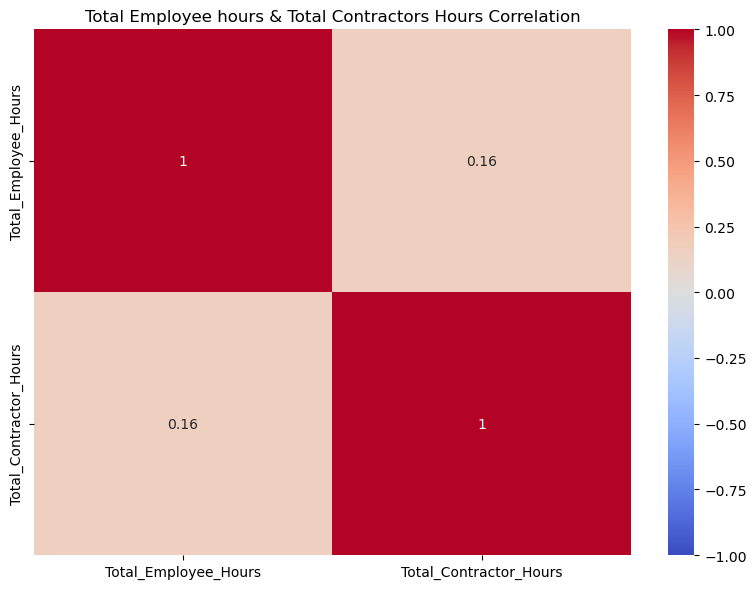

In [183]:

# Select only the numerical columns (exclude 'WorkDate')
numerical_df = df_extracted[['Total_Employee_Hours', 'Total_Contractor_Hours']]

# Create a correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add title
plt.title('Total Employee hours & Total Contractors Hours Correlation')

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.savefig('Chart5.2.png')
plt.show()


In [85]:
# Load and prepare the provider_info data
provider_info_df = pd.read_csv('/Users/mac/Desktop/-Health-Sales-Data-/NH_ProviderInfo_Sep2024.csv')

In [100]:
# merge the provider_info data and nursing data provided for more insights for facilitites type 
merged_df_info = pd.merge(df_melted, provider_info_df, left_on='PROVNUM', right_on='CMS Certification Number (CCN)', how='inner')


In [101]:
#check for the value for of owner of the facilitites 
merged_df_info['Ownership Type'].unique()

array(['Non profit - Church related', 'For profit - Partnership',
       'Government - County', 'Government - State',
       'For profit - Corporation',
       'For profit - Limited Liability company',
       'For profit - Individual', 'Non profit - Corporation',
       'Government - Hospital district', 'Non profit - Other',
       'Government - Federal', 'Government - City',
       'Government - City/county'], dtype=object)

In [102]:
#Rename column for avioding spelling error retreving 
merged_df_info.rename(columns={'Ownership Type': 'OwnershipType'}, inplace=True)

In [106]:
#Change the Ownership to to 3 categories Goverment , Profit , Non Profit by create function for easy insights 
def categorize_ownership(value):
    if 'Government' in value:
        return 'Government'
    elif 'For profit' in value:
        return 'For profit'
    elif 'Non profit' in value:
        return 'Non profit'
    else:
        return 'Other'  # In case there are values that do not match the expected patterns



In [107]:
# Apply the function to the 'OwnershipType' column and categorized for analyize ploting
merged_df_info['ownership_category'] = merged_df_info['OwnershipType'].apply(categorize_ownership)



In [104]:
#check for column names 
for col in merged_df_info.columns:
    print(col)

PROVNUM
PROVNAME
CITY
STATE
COUNTY_NAME
COUNTY_FIPS
CY_Qtr
WorkDate
MDScensus
Hour_Type
Hours
DayOfWeek
CMS Certification Number (CCN)
Provider Name
Provider Address
City/Town
State
ZIP Code
Telephone Number
Provider SSA County Code
County/Parish
OwnershipType
Number of Certified Beds
Average Number of Residents per Day
Average Number of Residents per Day Footnote
Provider Type
Provider Resides in Hospital
Legal Business Name
Date First Approved to Provide Medicare and Medicaid Services
Affiliated Entity Name
Affiliated Entity ID
Continuing Care Retirement Community
Special Focus Status
Abuse Icon
Most Recent Health Inspection More Than 2 Years Ago
Provider Changed Ownership in Last 12 Months
With a Resident and Family Council
Automatic Sprinkler Systems in All Required Areas
Overall Rating
Overall Rating Footnote
Health Inspection Rating
Health Inspection Rating Footnote
QM Rating
QM Rating Footnote
Long-Stay QM Rating
Long-Stay QM Rating Footnote
Short-Stay QM Rating
Short-Stay QM Ra

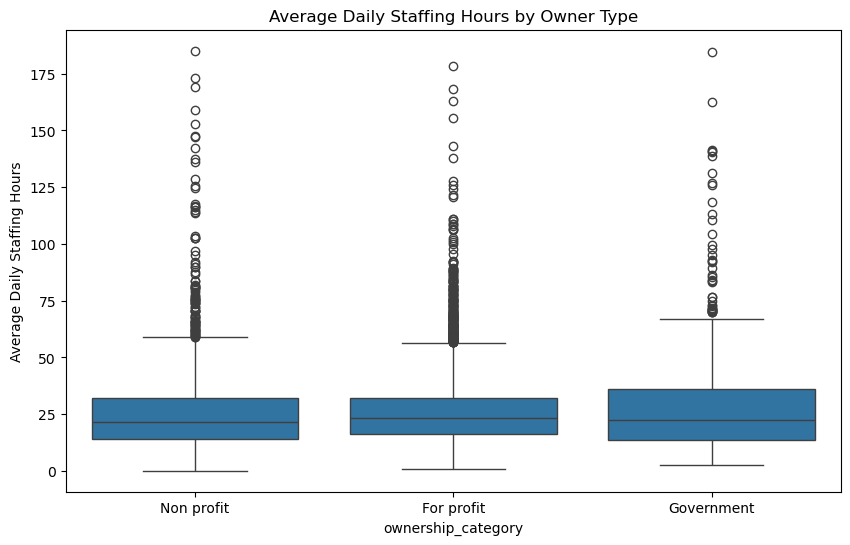

In [109]:
# Ownership Type and Staffing Levels
# Calculate average total hours per day for each facility
facility_avg_hours = merged_df_info.groupby('PROVNUM')['Hours'].mean().reset_index()

# Get the primary owner type for each facility
facility_owner_type = merged_df_info.groupby('PROVNUM')['ownership_category'].first().reset_index()

# Merge the two
facility_data = pd.merge(facility_avg_hours, facility_owner_type, on='PROVNUM')

plt.figure(figsize=(10, 6))
sns.boxplot(x='ownership_category', y='Hours', data=facility_data)
plt.title('Average Daily Staffing Hours by Owner Type')
plt.ylabel('Average Daily Staffing Hours')
plt.savefig('Average Daily Staffing Hours by Owner Type Chart5.1.png')
plt.show()

In [ ]:
merged_df.rename(columns={'Association Date': 'AssociationDate'}, inplace=True)

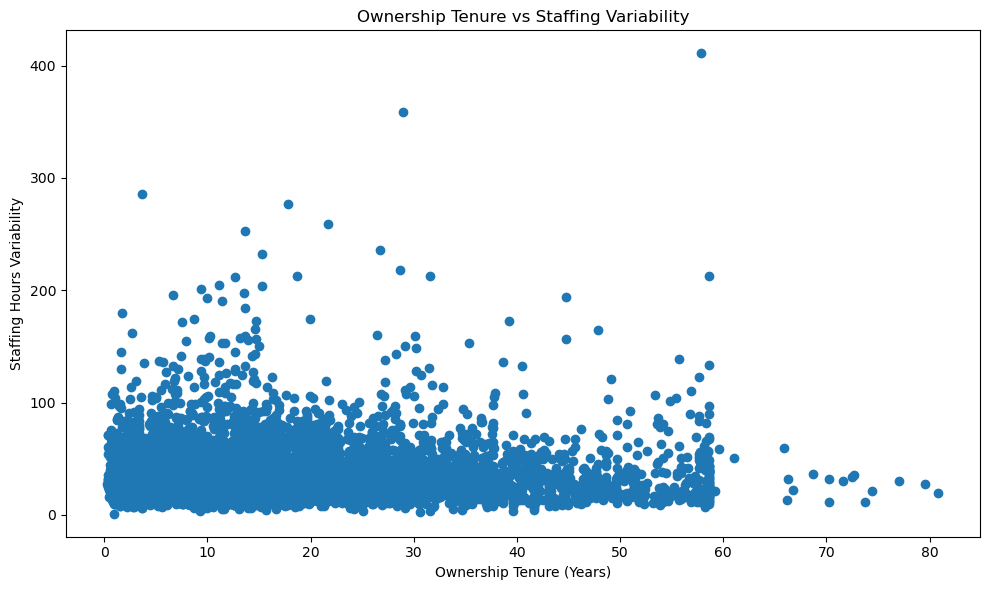

In [184]:
# Ownership Tenure and Staffing Stability
# Calculate ownership tenure
merged_df['Ownership_Tenure'] = (pd.to_datetime('2024-09-01') - merged_df['Association Date']).dt.days / 365.25

# Calculate staffing hour variability for each facility
staffing_variability = merged_df.groupby('PROVNUM')['Total_Hours'].std().reset_index()
staffing_variability = staffing_variability.rename(columns={'Total_Hours': 'Staffing_Variability'})

# Get the maximum tenure for each facility (assuming the longest-tenured owner)
max_tenure = merged_df.groupby('PROVNUM')['Ownership_Tenure'].max().reset_index()

# Merge tenure and variability data
tenure_variability = pd.merge(max_tenure, staffing_variability, on='PROVNUM')

plt.figure(figsize=(10, 6))
plt.scatter(tenure_variability['Ownership_Tenure'], tenure_variability['Staffing_Variability'])
plt.title('Ownership Tenure vs Staffing Variability')
plt.xlabel('Ownership Tenure (Years)')
plt.ylabel('Staffing Hours Variability')
plt.savefig('Chart5.3.png')
plt.tight_layout()
plt.show()

In [ ]:
merged_df.rename(columns={'Role played by Owner or Manager in Facility': 'RolePlayedByManageOrOwner'}, inplace=True)

In [64]:
merged_df['Management_Structure'] = merged_df['Role played by Owner or Manager in Facility'].apply(simplify_role)

In [66]:
merged_df.head(2)

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,ZIP Code,Role played by Owner or Manager in Facility,Owner Type,Owner Name,Ownership Percentage,Association Date,Location,Processing Date,Management_Structure,Ownership_Tenure
0,01A193,FATHER PURCELL MEMORIAL EXCEPTIONAL CHILDREN'S...,MONTGOMERY,AL,Montgomery,101,2024Q1,2024-01-01,44,0.0,...,36108,Ownership Data Not Available,NaN,NaN,NaN,NaT,"2048 W FAIRVIEW AVE,MONTGOMERY,AL,36108",2024-09-01,Other,NaN
1,01A193,FATHER PURCELL MEMORIAL EXCEPTIONAL CHILDREN'S...,MONTGOMERY,AL,Montgomery,101,2024Q1,2024-01-02,44,0.0,...,36108,Ownership Data Not Available,NaN,NaN,NaN,NaT,"2048 W FAIRVIEW AVE,MONTGOMERY,AL,36108",2024-09-01,Other,NaN


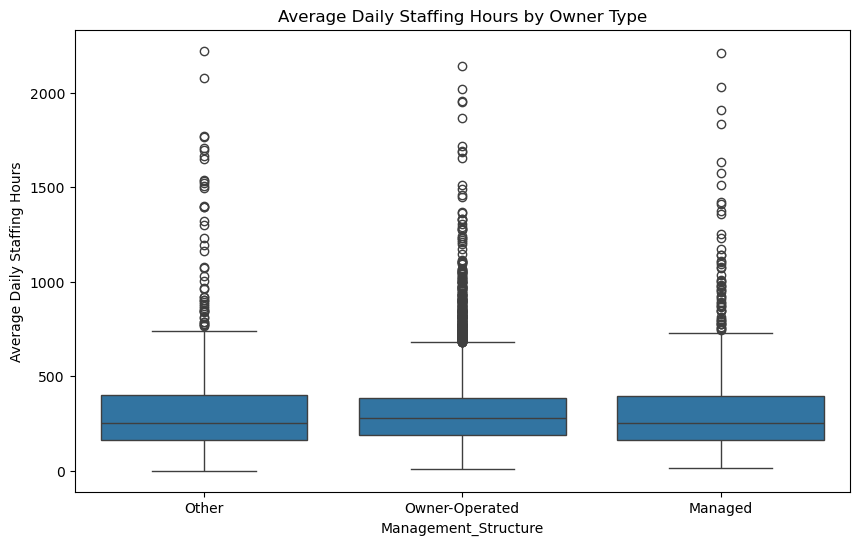

In [156]:



        

# Calculate average total hours per day for each facility
facility_avg_hours = merged_df.groupby('PROVNUM')['Total_Hours'].mean().reset_index()

# Get the primary owner type for each facility
facility_owner_type = merged_df.groupby('PROVNUM')['Management_Structure'].first().reset_index()

# Merge the two
facility_data = pd.merge(facility_avg_hours, facility_owner_type, on='PROVNUM')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Management_Structure', y='Total_Hours', data=facility_data)
plt.title('Average Daily Staffing Hours by Owner Type')
plt.ylabel('Average Daily Staffing Hours')
plt.savefig('Average Daily Staffing Hours by Owner Type.png')
plt.show()

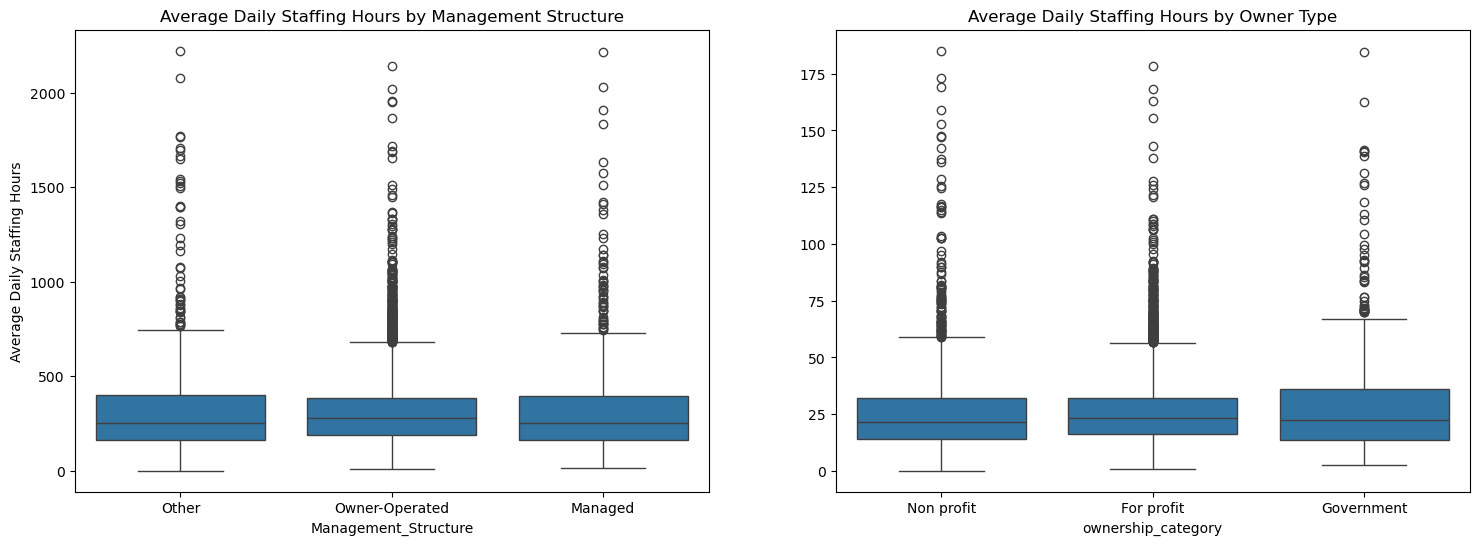

In [185]:

# Creating the previous plots next to each other for easy comparsion 

# Calculate average total hours per day for each facility for first dataset
facility_avg_hours_1 = merged_df.groupby('PROVNUM')['Total_Hours'].mean().reset_index()
facility_owner_type_1 = merged_df.groupby('PROVNUM')['Management_Structure'].first().reset_index()
facility_data_1 = pd.merge(facility_avg_hours_1, facility_owner_type_1, on='PROVNUM')

# Calculate average total hours per day for each facility for second dataset
facility_avg_hours_2 = merged_df_info.groupby('PROVNUM')['Hours'].mean().reset_index()
facility_owner_type_2 = merged_df_info.groupby('PROVNUM')['ownership_category'].first().reset_index()
facility_data_2 = pd.merge(facility_avg_hours_2, facility_owner_type_2, on='PROVNUM')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot the first boxplot
sns.boxplot(x='Management_Structure', y='Total_Hours', data=facility_data_1, ax=axes[0])
axes[0].set_title('Average Daily Staffing Hours by Management Structure')
axes[0].set_ylabel('Average Daily Staffing Hours')

# Plot the second boxplot
sns.boxplot(x='ownership_category', y='Hours', data=facility_data_2, ax=axes[1])
axes[1].set_title('Average Daily Staffing Hours by Owner Type')
axes[1].set_ylabel('')

# Save and show the figure
plt.savefig('Chart5.4.png')
plt.show()
